### Домашнее задание <a class="anchor" id="hw"></a><center>

**1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.**

### Реализация алгоритма kNN<a class='anchor' id='implement_knn'>

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [66]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

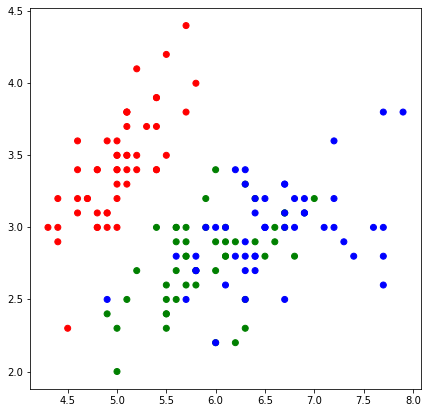

In [68]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [69]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [70]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [71]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [72]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [73]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_train, y_train):.3f} (train)')
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f} (test)')

Точность алгоритма при k = 2: 0.858 (train)
Точность алгоритма при k = 2: 0.733 (test)


In [74]:
k = 100

y_pred_train = knn(X_train, y_train, X_train, k)
y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_train, y_train):.3f} (train)')
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f} (test)')

Точность алгоритма при k = 100: 0.775 (train)
Точность алгоритма при k = 100: 0.667 (test)


In [75]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов

#ИЗМЕНЕНИЯ
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            
            classes[d[1]] += w
#ИЗМЕНЕНИЯ
    
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

**От номера соседа $i$ веса можно определять как:**

### - $w(i) = q^{i}$,   $q \in (0,1)$;

In [76]:
def weights_number(i, d):
    q = 0.5
    return q ** i

In [77]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_number)
y_pred = knn(X_train, y_train, X_test, k, weights_number)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на трейне при k = 100: 0.925
Точность алгоритма на тесте при k = 100: 0.700


**От расстояния $d$ веса можно определять как:**

### - $w(d) = q^{d}$,   $q \in (0,1)$;

In [78]:
def weights_distance(i, d):
    q = 0.3
    return q ** d

In [79]:
y_pred_train = knn(X_train, y_train, X_train, k, weights_distance)
y_pred = knn(X_train, y_train, X_test, k, weights_distance)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма на трейне при k = 100: 0.858
Точность алгоритма на тесте при k = 100: 0.700


**2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).**

Сделаем простую реализацию алгоритма K-means своими руками на Python.

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [80]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=1000, random_state=2)

Изобразим точки на графике.

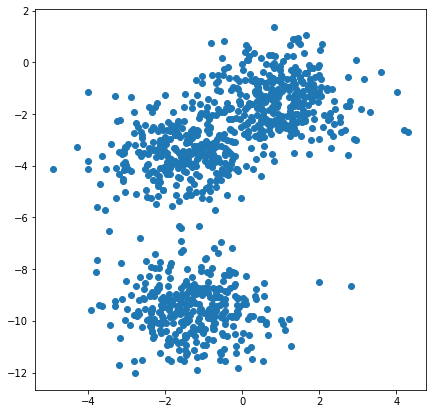

In [81]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [82]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

Напишем функцию для визуализации кластеров

In [83]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [84]:
# определим максимальное количество итераций
max_iterations = 2

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

Проверим результат алгоритма после одной итерации

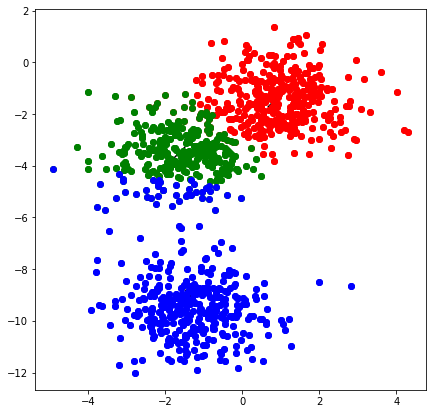

CPU times: user 12.9 s, sys: 188 ms, total: 13.1 s
Wall time: 15.5 s


In [85]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Проверим работу алгоритма при различном числе итераций.

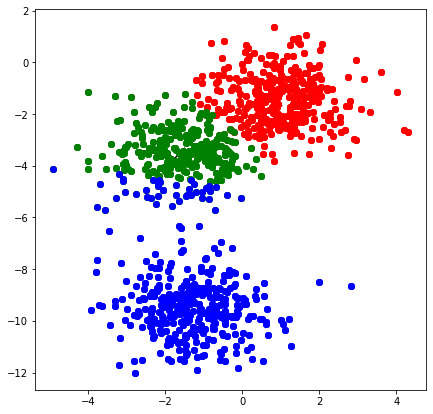

CPU times: user 23.4 s, sys: 172 ms, total: 23.5 s
Wall time: 24.4 s


In [86]:
%%time
max_iterations = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

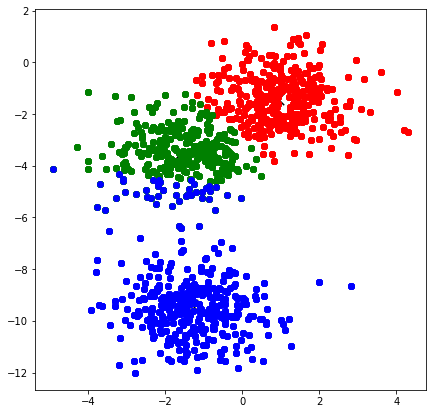

CPU times: user 56.2 s, sys: 358 ms, total: 56.5 s
Wall time: 57.3 s


In [87]:
%%time
max_iterations = 5

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

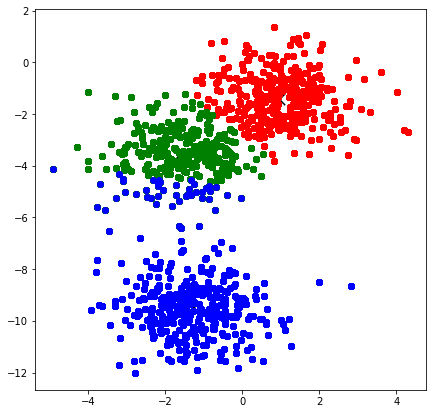

CPU times: user 3min 43s, sys: 1.98 s, total: 3min 45s
Wall time: 4min


In [88]:
%%time
max_iterations = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Видно, как при увеличении количества итераций центроиды перемещаются в центр образующихся кластеров.

**ИЗМЕНЕНИЯ**

- Среднее квадратичное внутрикластерное расстояние.

$$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k})$$

In [89]:
def mean_square_cluster(clusters, centroids):
    rezult = 0
    for cluster, data in clusters.items():
        distance = 0
        for x in data:
            distance += e_metrics(centroids[cluster], x) ** 2
        distance /= len(data)
        rezult += distance
    return rezult

In [90]:
from tqdm import tqdm

num_clusters = range(1, 10) #взяла на 1 меньше для наглядности
errors = []

for k in tqdm(num_clusters):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    errors.append(mean_square_cluster(clusters, centroids))

100%|██████████| 9/9 [00:04<00:00,  2.19it/s]


Text(0, 0.5, 'Среднее квадратичное внутрикластерное расстояние')

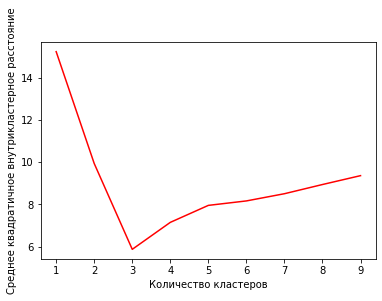

In [91]:
plt.plot(num_clusters, errors, color = 'r')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее квадратичное внутрикластерное расстояние')

**На графике видим, что оптимальное количество кластеров - 3 (три)**